In [1]:
#Jay Saraf 2020438
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn import metrics, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Reading the Dry_Bean_Dataset.csv file and then printing it.

In [2]:
df = pd.read_csv('Dry_Bean_Dataset.csv')
print(df)

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.54981

Checking some top elements of the table.

In [3]:
df.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [5]:
df.shape

(13611, 17)

In [6]:
df.nunique()

Area               12011
Perimeter          13351
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         12066
EquivDiameter      12011
Extent             13535
Solidity           13522
roundness          13540
Compactness        13543
ShapeFactor1       13521
ShapeFactor2       13506
ShapeFactor3       13543
ShapeFactor4       13532
Class                  7
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

# Answer 3(a)

In [8]:
# Calculate unique occurences of the output and store it in y_store.
# Calculate unique values in the output and store it in x_store.

y_store = df['Class'].value_counts().tolist()
x_store = df['Class'].value_counts().keys().tolist()

In [9]:
print(y_store)

[3546, 2636, 2027, 1928, 1630, 1322, 522]


In [10]:
print(x_store)

['DERMASON', 'SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY']


Getting count(occurence) of the unique values.

In [11]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

C:\Users\JAYSA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Classes'), Text(0, 0.5, 'Frequency')]

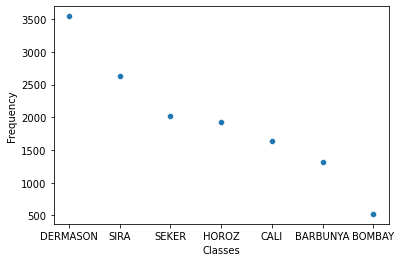

In [12]:
# Plotting scatter plot.
class_distribution = sns.scatterplot(x_store,y_store)
class_distribution.set(xlabel='Classes',ylabel='Frequency')

In the above scatter plot it can be seen that as we go from left(DERMASON) ro right(BOMBAY) the dot coordinate goes down. The frequency gets lower.

# EDA

# Answer 3 (b)

[Text(0.5, 0, 'Area'), Text(0, 0.5, 'Perimter')]

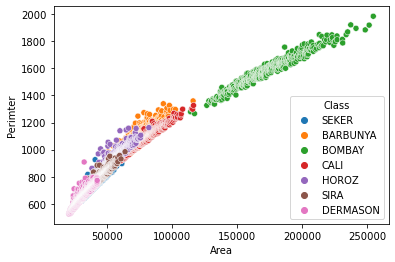

In [13]:
y_plot1 = df['Area'].value_counts().tolist()
x_plot1 = df['Area'].value_counts().keys().tolist()

area_distribution = sns.scatterplot(x = df['Area'],y = df['Perimeter'],hue=df['Class'])
area_distribution.set(xlabel='Area',ylabel='Perimter')
# print("y_val",y_plot1)
# print("x_Val",x_plot1)

In the above Perimeter vs Area graph it can be seen that BOMBAY is clustered and easily seperable in comparison to other classes. While it is difficult to segregate HOROZ,BARBUNYA and CALI.

<AxesSubplot:xlabel='MajorAxisLength', ylabel='MinorAxisLength'>

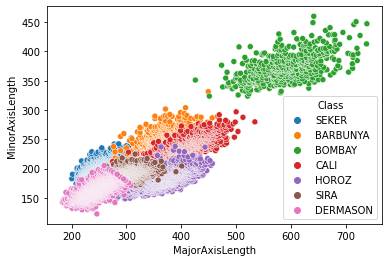

In [14]:
sns.scatterplot(x = df['MajorAxisLength'],y = df['MinorAxisLength'],hue =df['Class'])

The above graph is Minor Axis Length vs Major Axis length. I used it to find the correlation between the major and the minor axis lenghts.

<AxesSubplot:xlabel='Compactness', ylabel='Count'>

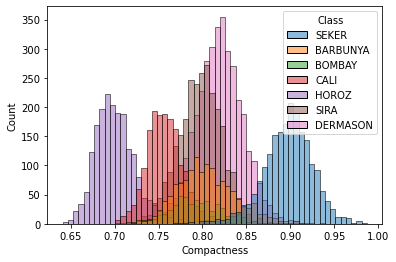

In [15]:
x_plot3 = df['Compactness']
sns.histplot(data=df,x = x_plot3,hue =df['Class'])

The above graph is Count vs Compactness graph. This shows the count of different classes present according to their compactness.

<AxesSubplot:xlabel='Solidity', ylabel='Count'>

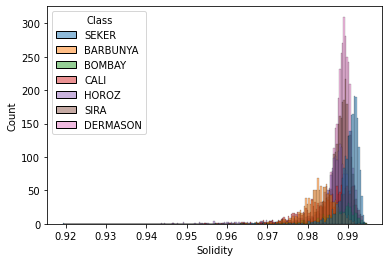

In [16]:
x_plot4 = df['Solidity']
sns.histplot(data=df,x = x_plot4,hue =df['Class'])

The above graph is Count vs Solidity graph.This shows the count of different classes present according to their solidity.

<AxesSubplot:xlabel='ShapeFactor1', ylabel='ShapeFactor2'>

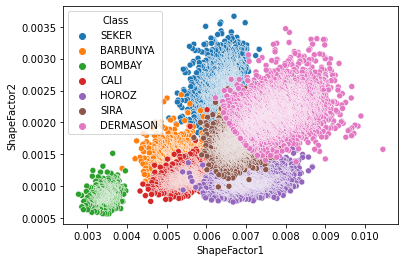

In [17]:
x_plot5 = df['ShapeFactor1']
y_plot5 = df['ShapeFactor2']
sns.scatterplot(data = df,x = x_plot5,y = y_plot5,hue =df['Class'])

The above graph is ShapeFactor2 vs ShapeFactor1 graph.

<AxesSubplot:xlabel='roundness', ylabel='Count'>

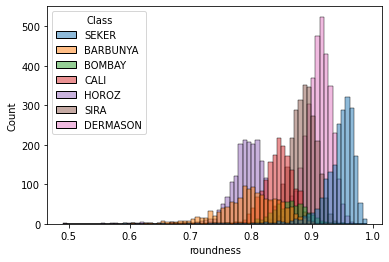

In [18]:
x_plot6 = df['roundness']
sns.histplot(data=df,x = x_plot6,hue =df['Class'])

The above graph is count vs roundness graph.

Checking the missing values if any.

In [19]:
df.isnull()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13607,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13608,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13609,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Answer 3(b)2

<AxesSubplot:>

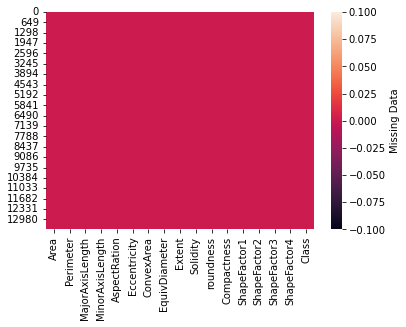

In [20]:
sns.heatmap(df.isna(),cbar_kws={'label':'Missing Data'})

This heatmap  shows that there are no missing values for different features in the dataset. 

# Answer 3(c)

target is storing all the values of class column.

In [21]:
target = df['Class']
print(target)

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object


dropping class from df.

In [22]:
feature = df.drop("Class",axis=1)
feature

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


Here I am standardizing the data.

In [23]:
standardized_data = StandardScaler().fit_transform(feature)
standardized_data

array([[-0.84074853, -1.1433189 , -1.30659814, ...,  2.4021726 ,
         1.92572347,  0.83837102],
       [-0.82918764, -1.01392388, -1.39591111, ...,  3.10089364,
         2.68970162,  0.77113831],
       [-0.80715717, -1.07882906, -1.25235661, ...,  2.23509111,
         1.84135576,  0.91675506],
       ...,
       [-0.37203825, -0.44783294, -0.45047814, ...,  0.28920501,
         0.33632829,  0.39025106],
       [-0.37176543, -0.42702856, -0.42897404, ...,  0.22837456,
         0.2489734 ,  0.03644007],
       [-0.37135619, -0.38755718, -0.2917356 , ..., -0.12777538,
        -0.27648141,  0.71371941]])

In [24]:
data_detail = standardized_data[0:13611,:]
target_detail = target[0:13611]

In [25]:
model = TSNE(n_components = 2,random_state = 0)

In [26]:
tsne_data = model.fit_transform(data_detail)

C:\Users\JAYSA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\JAYSA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [27]:
tsne_data = np.vstack((tsne_data.T,target_detail)).T

In [28]:
tsne_df = pd.DataFrame(data = tsne_data,columns = ("Feature_1","Feature_2","label"))

C:\Users\JAYSA\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


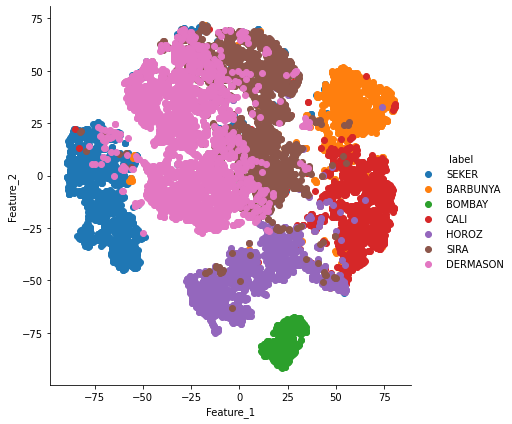

<AxesSubplot:xlabel='Feature_1', ylabel='Feature_2'>

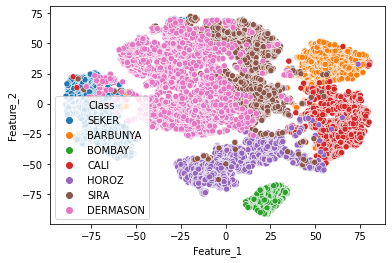

In [29]:
sns.FacetGrid(tsne_df,hue = "label",size=6).map(plt.scatter,"Feature_1","Feature_2").add_legend()
plt.show()
# FacetGrid for tsne Feature 2 vs Feature 1.
sns.scatterplot(x = tsne_df['Feature_1'],y = tsne_df['Feature_2'],hue =df['Class'])

tsne Feature 2 vs Feature 1 scatter plot.

# Answer 3(d)

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_detail, target_detail, test_size = 0.2, random_state = 42)

In [31]:
from sklearn.naive_bayes import GaussianNB
gaussian_classifier = GaussianNB()
gaussian_classifier.fit(x_train,y_train)

GaussianNB()

In [32]:
print("Navie Bayes score using Gaussian: ",gaussian_classifier.score(x_test,y_test))
y_gaussian_expected = y_test
y_gaussian_predicted = gaussian_classifier.predict(x_test)
print("Accuracy using Gaussian is",accuracy_score(y_gaussian_expected,y_gaussian_predicted))

Navie Bayes score using Gaussian:  0.9037825927286082
Accuracy using Gaussian is 0.9037825927286082


In [33]:
print(classification_report(y_test,y_gaussian_predicted))

              precision    recall  f1-score   support

    BARBUNYA       0.84      0.81      0.83       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.87      0.90      0.88       317
    DERMASON       0.93      0.87      0.90       671
       HOROZ       0.96      0.96      0.96       408
       SEKER       0.94      0.95      0.95       413
        SIRA       0.83      0.90      0.86       536

    accuracy                           0.90      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.91      0.90      0.90      2723



In [34]:
cm1 = confusion_matrix(y_test,y_gaussian_predicted)
cm1

array([[212,   0,  37,   0,   1,   1,  10],
       [  0, 117,   0,   0,   0,   0,   0],
       [ 29,   0, 284,   0,   3,   0,   1],
       [  0,   0,   0, 583,   0,  16,  72],
       [  1,   0,   5,   6, 393,   0,   3],
       [  7,   0,   0,   4,   0, 392,  10],
       [  2,   0,   0,  36,  12,   6, 480]], dtype=int64)

Text(33.0, 0.5, 'Actual Values')

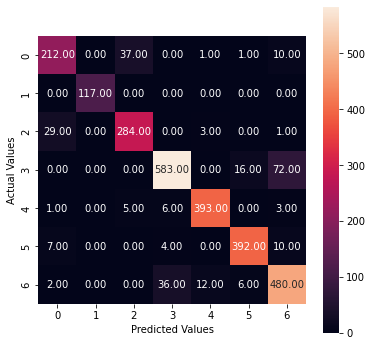

In [35]:
plt.figure(figsize=(6,6))
sns.heatmap(cm1,annot = True,fmt = '0.2f',square = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [36]:
from sklearn.naive_bayes import BernoulliNB


In [37]:
bernoulli_classifier = BernoulliNB()
print(x_train)

[[-0.81752445 -1.02169402 -0.99287338 ...  0.87726787  0.26689369
   0.34819918]
 [-0.5100868  -0.46712995 -0.57257078 ...  0.32942131  0.16578407
   0.05365717]
 [-0.75296766 -0.95088074 -1.05002561 ...  1.38279192  1.01759324
   0.34826469]
 ...
 [ 1.26029711  1.40616472  1.595202   ... -1.29550474 -0.95452972
  -0.23543445]
 [-0.49866232 -0.67141233 -0.85709382 ...  1.41551308  1.61954278
   0.86165139]
 [ 0.36079899  0.6631759   0.94108189 ... -1.22108034 -1.40651082
  -0.99763587]]


In [38]:
bernoulli_classifier.fit(x_train,y_train)

BernoulliNB()

In [39]:
y_bernoulli_expected = y_test
y_bernoulli_predicted = bernoulli_classifier.predict(x_test)
print("Accuracy using Bernoulli is",accuracy_score(y_bernoulli_expected,y_bernoulli_predicted))

Accuracy using Bernoulli is 0.7040029379360999


In [40]:
print(classification_report(y_test,y_bernoulli_predicted))

              precision    recall  f1-score   support

    BARBUNYA       0.88      0.51      0.65       261
      BOMBAY       0.67      0.38      0.49       117
        CALI       0.58      0.95      0.72       317
    DERMASON       0.66      0.80      0.73       671
       HOROZ       0.87      0.84      0.86       408
       SEKER       0.83      0.67      0.74       413
        SIRA       0.63      0.52      0.57       536

    accuracy                           0.70      2723
   macro avg       0.73      0.67      0.68      2723
weighted avg       0.72      0.70      0.70      2723



In [41]:
cm2 = confusion_matrix(y_test,y_bernoulli_predicted)
cm2

array([[133,  10, 105,   0,   3,   3,   7],
       [  8,  45,  64,   0,   0,   0,   0],
       [  4,   9, 300,   0,   3,   1,   0],
       [  0,   0,   0, 540,   0,   3, 128],
       [  0,   0,  39,   0, 344,   0,  25],
       [  2,   2,   1, 127,   0, 277,   4],
       [  4,   1,   8, 149,  45,  51, 278]], dtype=int64)

Text(33.0, 0.5, 'Actual Values')

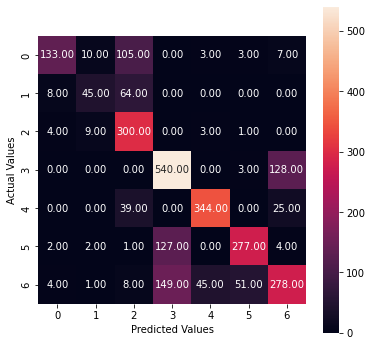

In [42]:
plt.figure(figsize=(6,6))
sns.heatmap(cm2,annot = True,fmt = '0.2f',square = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [43]:
print(precision_score(y_gaussian_expected,y_gaussian_predicted,average='micro'))
print(precision_score(y_bernoulli_expected,y_bernoulli_predicted,average='micro'))

0.9037825927286082
0.7040029379360999


In [44]:
print(recall_score(y_gaussian_expected,y_gaussian_predicted,average='micro'))
print(recall_score(y_bernoulli_expected,y_bernoulli_predicted,average='micro'))

0.9037825927286082
0.7040029379360999


In [45]:
print(f1_score(y_gaussian_expected,y_gaussian_predicted,average='micro'))
print(f1_score(y_bernoulli_expected,y_bernoulli_predicted,average='micro'))

0.9037825927286082
0.7040029379360999


# Answer 3(e)

In [46]:
from sklearn.decomposition import PCA

In [47]:
for i in range(2,17):
    pca = PCA(n_components = i)
    pca.fit(standardized_data)
    x_pca = pca.transform(standardized_data)
    print(f"Variances of {i} components: {pca.explained_variance_ratio_ * 100}")    
pca.fit(standardized_data)

Variances of 2 components: [55.46643863 26.43097319]
Variances of 3 components: [55.46643863 26.43097319  8.00656422]
Variances of 4 components: [55.46643863 26.43097319  8.00656422  5.11408029]
Variances of 5 components: [55.46643863 26.43097319  8.00656422  5.11408029  2.7392929 ]
Variances of 6 components: [55.46643863 26.43097319  8.00656422  5.11408029  2.7392929   1.14976093]
Variances of 7 components: [55.46643863 26.43097319  8.00656422  5.11408029  2.7392929   1.14976093
  0.69765072]
Variances of 8 components: [55.46643863 26.43097319  8.00656422  5.11408029  2.7392929   1.14976093
  0.69765072  0.3250825 ]
Variances of 9 components: [5.54664386e+01 2.64309732e+01 8.00656422e+00 5.11408029e+00
 2.73929290e+00 1.14976093e+00 6.97650724e-01 3.25082500e-01
 5.16266295e-02]
Variances of 10 components: [5.54664386e+01 2.64309732e+01 8.00656422e+00 5.11408029e+00
 2.73929290e+00 1.14976093e+00 6.97650724e-01 3.25082500e-01
 5.16266295e-02 9.08681206e-03]
Variances of 11 components:

PCA(n_components=16)

In [48]:
x_pca = pca.transform(standardized_data)

In [49]:
standardized_data.shape

(13611, 16)

In [50]:
x_pca.shape
# x_pca

(13611, 16)

In [51]:
x_pca

array([[-4.98156089e+00,  1.82469732e+00,  7.49020946e-01, ...,
        -6.16115078e-04, -2.11823031e-03, -3.97994235e-04],
       [-5.43679235e+00,  2.93236494e+00,  2.18237404e+00, ...,
         4.80628772e-03,  2.27428548e-03, -3.12222849e-03],
       [-4.75808821e+00,  1.82688375e+00,  5.14037595e-01, ...,
         9.71267866e-04, -2.48858619e-03, -2.16624330e-04],
       ...,
       [-1.41751491e+00,  1.41193768e-01, -3.87206295e-01, ...,
        -4.17708586e-04,  9.87198760e-04, -3.20950220e-04],
       [-1.11466563e+00, -2.12679494e-01,  1.44088202e-01, ...,
        -1.23649188e-03,  1.31750288e-03, -4.93292116e-04],
       [-7.66436909e-01, -6.46513925e-01, -9.94121404e-01, ...,
         8.39084843e-04, -4.81785232e-05,  7.29014764e-04]])

In [52]:
# principal_df = pd.DataFrame(data = x_pca
#              , columns = ['principal component 1', 'principal component 2'])

In [53]:
# final_df = pd.concat([principal_df,df[['Class']]],axis = 1)

In [54]:
x_pca_train,x_pca_test,y_pca_train,y_pca_test = train_test_split(x_pca,target,test_size = 0.2,shuffle = True)

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

clf_pca = GaussianNB()
clf_pca.fit(x_pca_train,y_pca_train)
clf_pca.score(x_pca_test,y_pca_test)
y_pca_predict = clf_pca.predict(x_test_pca)

cm_pca = confusion_matrix(y_test,y_pca_predict)
cm_pca


array([[217,   3,  25,   0,   1,   1,  14],
       [  0, 117,   0,   0,   0,   0,   0],
       [  7,   1, 295,   0,   9,   0,   5],
       [  3,   0,   0, 515,   6,   2, 145],
       [  1,   0,   7,   3, 390,   0,   7],
       [  7,   0,   0,  11,   0, 384,  11],
       [  3,   0,   0,  17,  13,   2, 501]], dtype=int64)

In [55]:
for i in range(2,17):
    pca = PCA(n_components = i)
    pca.fit(standardized_data)
    x_pca = pca.transform(standardized_data)
    x_pca_train,x_pca_test,y_pca_train,y_pca_test = train_test_split(x_pca,target,test_size = 0.2,shuffle = True)

    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)

    clf_pca = GaussianNB()
    clf_pca.fit(x_pca_train,y_pca_train)
    clf_pca.score(x_pca_test,y_pca_test)
    y_pca_predict = clf_pca.predict(x_test_pca)
    print(y_pca_predict)

['SEKER' 'CALI' 'SEKER' ... 'DERMASON' 'CALI' 'SIRA']
['SEKER' 'CALI' 'SEKER' ... 'DERMASON' 'CALI' 'SIRA']
['SEKER' 'CALI' 'SEKER' ... 'DERMASON' 'CALI' 'SIRA']
['SEKER' 'BARBUNYA' 'SEKER' ... 'DERMASON' 'CALI' 'SIRA']
['SEKER' 'BARBUNYA' 'SEKER' ... 'DERMASON' 'CALI' 'SIRA']
['SEKER' 'BARBUNYA' 'SEKER' ... 'DERMASON' 'CALI' 'SIRA']
['SEKER' 'BARBUNYA' 'SEKER' ... 'DERMASON' 'CALI' 'SIRA']
['SEKER' 'BARBUNYA' 'SEKER' ... 'DERMASON' 'CALI' 'SIRA']
['SEKER' 'BARBUNYA' 'SEKER' ... 'DERMASON' 'CALI' 'SIRA']
['SEKER' 'BARBUNYA' 'SEKER' ... 'DERMASON' 'CALI' 'SIRA']
['SEKER' 'BARBUNYA' 'SEKER' ... 'DERMASON' 'CALI' 'SIRA']
['SEKER' 'BARBUNYA' 'SEKER' ... 'DERMASON' 'CALI' 'SIRA']
['SEKER' 'BARBUNYA' 'SEKER' ... 'DERMASON' 'CALI' 'SIRA']
['SEKER' 'BARBUNYA' 'SEKER' ... 'DERMASON' 'CALI' 'SIRA']
['SEKER' 'BARBUNYA' 'SEKER' ... 'DERMASON' 'CALI' 'SIRA']


In [56]:
for i in range(2,17,2):
    pca = PCA(n_components = i)
    pca.fit(standardized_data)
    x_pca = pca.transform(standardized_data)
    x_pca_train,x_pca_test,y_pca_train,y_pca_test = train_test_split(x_pca,target,test_size = 0.2,shuffle = True)

#     x_train_pca = pca.fit_transform(x_train)
#     x_test_pca = pca.transform(x_test)

    clf_pca = GaussianNB()
    clf_pca.fit(x_pca_train,y_pca_train)
    clf_pca.score(x_pca_test,y_pca_test)
    y_pca_predict = clf_pca.predict(x_pca_test)
    print("Accuracy using pca is",accuracy_score(y_pca_test,y_pca_predict))
    print(y_pca_predict)

Accuracy using pca is 0.8582445831803158
['BARBUNYA' 'SEKER' 'CALI' ... 'CALI' 'SIRA' 'HOROZ']
Accuracy using pca is 0.8703635695923614
['BOMBAY' 'SIRA' 'SEKER' ... 'SIRA' 'CALI' 'BARBUNYA']
Accuracy using pca is 0.8997429305912596
['SEKER' 'SEKER' 'DERMASON' ... 'HOROZ' 'DERMASON' 'SIRA']
Accuracy using pca is 0.8949687844289387
['SIRA' 'CALI' 'DERMASON' ... 'SIRA' 'SIRA' 'SIRA']
Accuracy using pca is 0.8894601542416453
['CALI' 'CALI' 'CALI' ... 'SEKER' 'SIRA' 'DERMASON']
Accuracy using pca is 0.8846860080793243
['DERMASON' 'SIRA' 'SIRA' ... 'CALI' 'DERMASON' 'SIRA']
Accuracy using pca is 0.876239441792141
['SIRA' 'DERMASON' 'BARBUNYA' ... 'SIRA' 'DERMASON' 'HOROZ']
Accuracy using pca is 0.8677928755049578
['BOMBAY' 'HOROZ' 'BARBUNYA' ... 'DERMASON' 'DERMASON' 'SEKER']


In [57]:
print(classification_report(y_test,y_pca_predict))

              precision    recall  f1-score   support

    BARBUNYA       0.12      0.11      0.12       261
      BOMBAY       0.04      0.03      0.04       117
        CALI       0.08      0.08      0.08       317
    DERMASON       0.25      0.22      0.23       671
       HOROZ       0.13      0.12      0.12       408
       SEKER       0.15      0.15      0.15       413
        SIRA       0.18      0.23      0.20       536

    accuracy                           0.16      2723
   macro avg       0.14      0.14      0.14      2723
weighted avg       0.16      0.16      0.16      2723



In [58]:
print("Accuracy using pca is",accuracy_score(y_pca_test,y_pca_predict))

Accuracy using pca is 0.8677928755049578


Accuracy is better than bernoulli. But worse than gaussian.

In [59]:
sc = StandardScaler()
features_scaled = sc.fit_transform(x_pca)

In [60]:
from sklearn.decomposition import PCA
components = None
pca_value = PCA(n_components = components)
pca_value.fit(features_scaled)

PCA()

# Answer 3(f)

0.9879764937588581

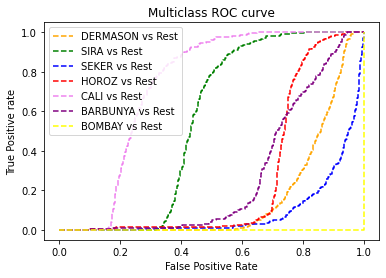

In [61]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB


x_train, x_test, y_train, y_test = train_test_split(data_detail, target_detail, test_size = 0.2, random_state = 42)

clf = OneVsRestClassifier(GaussianNB())
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
threshold ={}

n_class = ['DERMASON', 'SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY']
store = {'DERMASON':1, 'SIRA':2, 'SEKER':3, 'HOROZ':4, 'CALI':5, 'BARBUNYA':6, 'BOMBAY':7}
y_test= y_test.apply(lambda x : store[x])
for i in range(len(n_class)):    
    fpr[i], tpr[i], threshold[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i+1)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='DERMASON vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='SIRA vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='SEKER vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='HOROZ vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='violet', label='CALI vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='BARBUNYA vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='yellow', label='BOMBAY vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=500);

roc_auc_score(target_detail, clf.predict_proba(data_detail), multi_class='ovr')

C:\Users\JAYSA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


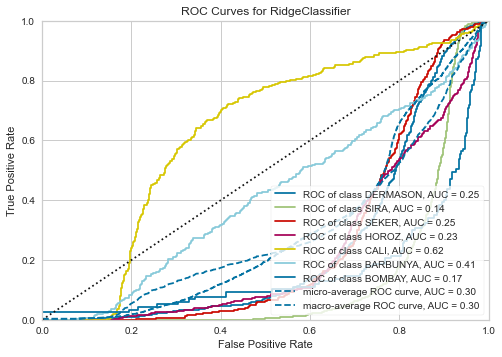

<AxesSubplot:title={'center':'ROC Curves for RidgeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [62]:
from sklearn.linear_model import RidgeClassifier
from yellowbrick.classifier import ROCAUC
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

x = OrdinalEncoder().fit_transform(data_detail)
y = LabelEncoder().fit_transform(target_detail)

roc_model = RidgeClassifier()
visualizer = ROCAUC(roc_model,classes=["DERMASON","SIRA","SEKER","HOROZ","CALI","BARBUNYA","BOMBAY"])
visualizer.fit(x_train, y_train) 
visualizer.score(x_test, y_test) 
visualizer.show()


# Answer 3(g)

In [63]:
from sklearn.linear_model import LogisticRegression
x_log_train,x_log_test,y_log_train,y_log_test = train_test_split(standardized_data,target,test_size = 0.2,shuffle = True)

In [64]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_log_train,y_log_train)

print('Training set score: %f',logistic_regression.score(x_log_train,y_log_train))
print('Testing set score: %f',logistic_regression.score(x_log_test,y_log_test))

Training set score: %f 0.924044819985305
Testing set score: %f 0.927653323540213


C:\Users\JAYSA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
size = target.shape
size

(13611,)

(g)

In [66]:
logistic_predicted = logistic_regression.predict(x_log_test)
print(logistic_predicted)

['DERMASON' 'CALI' 'SIRA' ... 'HOROZ' 'BARBUNYA' 'BARBUNYA']


In [67]:
print(classification_report(y_log_test,logistic_predicted))

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.93      0.93       249
      BOMBAY       1.00      1.00      1.00        93
        CALI       0.95      0.94      0.94       351
    DERMASON       0.93      0.92      0.92       749
       HOROZ       0.97      0.95      0.96       395
       SEKER       0.93      0.97      0.95       371
        SIRA       0.86      0.88      0.87       515

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [68]:
print(precision_score(y_log_test,logistic_predicted,average='macro'))

0.9392785786011962


In [69]:
print(recall_score(y_log_test,logistic_predicted,average='macro'))

0.9395639603843563


In [70]:
print(f1_score(y_log_test,logistic_predicted,average='macro'))

0.9393423784990632


In [71]:
print("Accuracy for logistic regression is",accuracy_score(y_log_test,logistic_predicted))

Accuracy for logistic regression is 0.927653323540213
